<a href="https://colab.research.google.com/github/hl1028/todoList/blob/master/Copy_of_train_huffinton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.feature_selection import chi2
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# files = []
# for i in range(7):
#     files.append(open('gdrive/My Drive/test' + str(i) + '.json', 'a'))
    
# index = 0
# count = 0
# with open('gdrive/My Drive/category_set.json') as f:
#     for line in f:
#         files[index].write(line)
#         count += 1
#         if count >= 30000:
#             files[index].close()
#             count = 0
#             index += 1



In [0]:
#filenames = ['gdrive/My Drive/test0.json', 'gdrive/My Drive/test1.json', 'gdrive/My Drive/test2.json']
filenames = ['gdrive/My Drive/category_set.json']
row_list = []
df = pd.DataFrame(columns=['category', 'authors', 'date', 'headline', 'link', 'short_description'])
count = 0
for filename in filenames:
    with open(filename, 'r') as file:
        lines = file.readlines()
        for line in lines:
            j = json.loads(line)
            row_list.append(j)
        
df = pd.DataFrame(row_list)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
authors              200853 non-null object
category             200853 non-null object
date                 200853 non-null object
headline             200853 non-null object
link                 200853 non-null object
short_description    200853 non-null object
dtypes: object(6)
memory usage: 9.2+ MB


In [0]:
columns = ['headline', 'category', 'short_description']
df = df[columns]
df = df[pd.notnull(df['short_description'])]
# df['short_description'] = df['headline'] + " " + df['short_description']

In [6]:
df.head()

,headline,category,short_description
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME,She left her husband. He killed their children...
1,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,Of course it has a song.
2,Hugh Grant Marries For The First Time At Age 57,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...
4,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ..."


In [0]:
df['short_description'] = df['headline'] + " " + df['short_description']
columns = ['category', 'short_description']
df = df[columns]
df.columns = columns

In [8]:
df.head()

,category,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


In [0]:
df['category_id'] = df['category'].factorize()[0]
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200853 entries, 0 to 200852
Data columns (total 3 columns):
category             200853 non-null object
short_description    200853 non-null object
category_id          200853 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.1+ MB


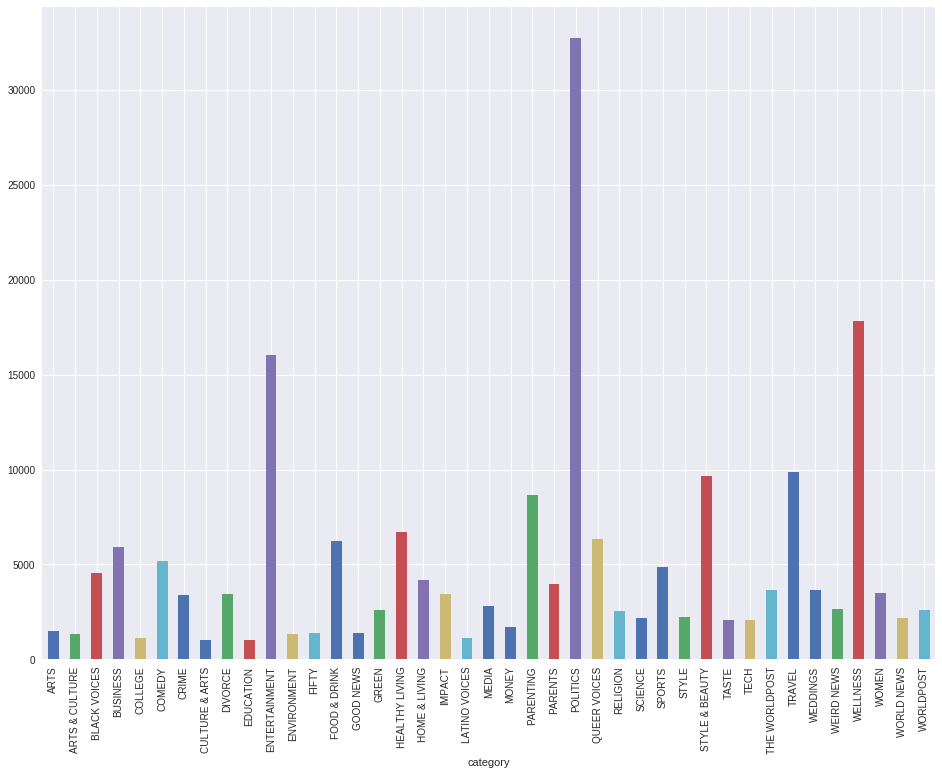

In [11]:
fig = plt.figure(figsize = (16, 12))
df.groupby('category').short_description.count().plot.bar(ylim=0)
plt.show()

In [12]:
stats = df.groupby('category').count()
print(len(stats))
after = df

41


In [13]:
# df.loc[df['category'] == 'SCIENCE', 'category'] = 'TECH'
# df.loc[df['category'] == 'CULTURE', 'category'] = 'ARTS & CULTURE'
# df.loc[df['category'] == 'ARTS', 'category'] = 'ARTS & CULTURE'
# df.loc[df['category'] == 'COLLEGE', 'category'] = 'EDUCATION'
# df.loc[df['category'] == 'COMEDY', 'category'] = 'ENTERTAINMENT'
# df.loc[df['category'] == 'CULTURE & ARTS', 'category'] = 'ARTS & CULTURE'
# df.loc[df['category'] == 'FOOD & DRINK', 'category'] = 'FOOD'
# df.loc[df['category'] == 'GREEN', 'category'] = 'ENVIRONMENT'
# df.loc[df['category'] == 'HEALTHY LIVING', 'category'] = 'LIVING'
# df.loc[df['category'] == 'HOME & LIVING', 'category'] = 'LIVING'
# df.loc[df['category'] == 'PARENTS', 'category'] = 'PARENTING'
# df.loc[df['category'] == 'STYLE & BEAUTY', 'category'] = 'STYLE'
# df.loc[df['category'] == 'TASTE', 'category'] = 'STYLE'
# df.loc[df['category'] == 'THE WORLDPOST', 'category'] = 'FOREIGN'
# df.loc[df['category'] == 'WORLD NEWS', 'category'] = 'FOREIGN'
# df.loc[df['category'] == 'WORLDPOST', 'category'] = 'FOREIGN'
# df.loc[df['category'] == 'MONEY', 'category'] = 'BUSINESS'

# df = df[df['category'] != 'BLACK VOICES']  
# df = df[df['category'] != 'FIFTY']
# df = df[df['category'] != 'GOOD NEWS']
# df = df[df['category'] != 'IMPACT']
# df = df[df['category'] != 'LATINO VOICES']
# df = df[df['category'] != 'QUEER VOICES']
# df = df[df['category'] != 'WEIRD NEWS']
# df = df[df['category'] != 'WEDDINGS']
# df = df[df['category'] != 'DIVORCE']
# df = df[df['category'] != 'RELIGION']
# df = df[df['category'] != 'WOMEN']
# df = df[df['category'] != 'PARENTING']

# after = df


# PP = df[df.category == 'POLITICS']
# drop_indices = np.random.choice(PP.index, 22000, replace=False)
# after = df.drop(drop_indices)

# EE = df[df.category == 'ENTERTAINMENT']
# drop_indices = np.random.choice(EE.index, 12500, replace=False)
# after = after.drop(drop_indices)

# WW = df[df.category == 'WELLNESS']
# drop_indices = np.random.choice(WW.index, 6000, replace=False)
# after = after.drop(drop_indices)

# SS = df[df.category == 'STYLE']
# drop_indices = np.random.choice(SS.index, 6000, replace=False)
# after = after.drop(drop_indices)

# print(len(after))

# drop_indices = np.random.choice(after.index, 50000, replace=False)
# after = after.drop(drop_indices)

print(len(after))

200853


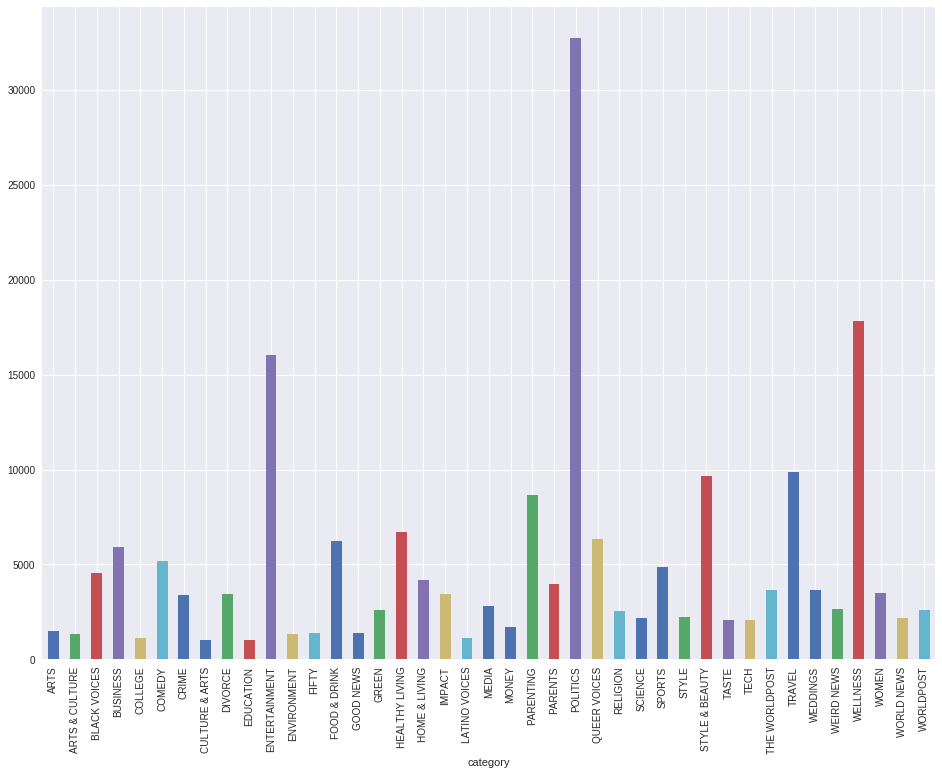

In [14]:
fig = plt.figure(figsize = (16, 12))
after.groupby('category').short_description.count().plot.bar(ylim=0)
plt.show()

In [0]:
 tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2), stop_words='english')
# features = tfidf.fit_transform(after.short_description).toarray()
# labels = after.category_id
# features.shape

In [0]:
# N = 2
# for Product, category_id in sorted(category_to_id.items()):
#     features_chi2 = chi2(features, labels == category_id)
#     indices = np.argsort(features_chi2[0])
#     feature_names = np.array(tfidf.get_feature_names())[indices]
#     unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#     bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#     print("# '{}':".format(Product))
#     print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#     print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(after['short_description'], after['category'], random_state = 0)
print(len(X_train), len(X_test))
count_vect = CountVectorizer(stop_words='english', min_df=5)
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer(smooth_idf=False, sublinear_tf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
#clf = LogisticRegression(fit_intercept = False).fit(X_train_tfidf, y_train)
#clf_cnn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16,), random_state=1, learning_rate='constant').fit(X_train_tfidf, y_train) 

150639 50214
(150639, 27401)


In [0]:
#print(clf.predict(count_vect.transform(["Maurice Greene aims to wipe out the pain of losing his Olympic 100m title in Athens by winning a fourth World Championship crown this summer."])))

In [33]:
# poli = sum([1 for i in range(len(bbc_y)) if bbc_y[i] == "BUSINESS"])
# print(poli)

# for i in range(len(bbc_y)):
#   if clf.predict(count_vect.transform([bbc_x[i]])) == bbc_y[i] and bbc_y[i] == "POLITICS":
#     print(clf.predict(count_vect.transform([bbc_x[i]])), bbc_y[i])

50.80164910673385


In [0]:
# filenames = ['April2017', 'April2018', 'Feb2017', 'Feb2018', 'Jan2017', 'Jan2018', 'March2017']
# filenames.extend(['March2018', 'March2018', 'May2017'])
# frames = []
# for filename in filenames:
#     frames.append(pd.read_csv('gdrive/My Drive/nyt-comments/Articles' + filename + '.csv'))
# ny_df = pd.concat(frames, ignore_index = True)
# col = ['newDesk', 'snippet']
# ny_df = ny_df[col]
# ny_df = ny_df[pd.notnull(df['snippet'])]
# ny_df = ny_df[ny_df.newDesk == 'Sports']
# ny_df['newDesk'] = ny_df['newDesk'].str.upper()
# ny_df.info()

In [0]:
# ny_x = ny_df['snippet']
# ny_y = ny_df['newDesk']
# print(len(ny_x))
# print(len(ny_y))
# print(ny_df.index)
# accuracy = sum([1 for i in ny_df.index  if clf.predict(count_vect.transform([ny_x[i]])) == ny_y[i]]) / 10006 * 100
# print(accuracy)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
   LinearSVC(),
   MultinomialNB(),
   LogisticRegression(random_state=0),
   MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16,), random_state=1, learning_rate='constant')
]

# models = [
#    LinearSVC()
# ]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


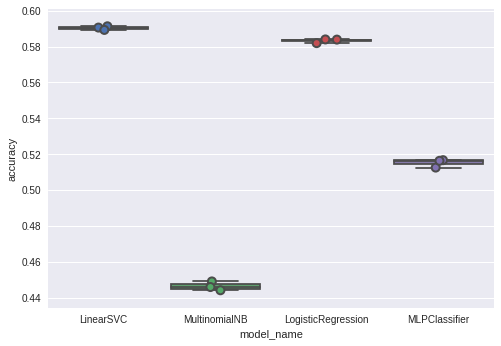

In [21]:
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tfidf, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
             size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [22]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.590425
LogisticRegression    0.583288
MLPClassifier         0.515159
MultinomialNB         0.446312
Name: accuracy, dtype: float64

**2. Raw Test on BBC**

In [23]:
test_df = pd.read_csv("gdrive/My Drive/bbc_test.csv")
bbc_y = test_df['category']
bbc_x = test_df['short_description']
for model in models:
    model_name = model.__class__.__name__
    clf = model.fit(X_train_tfidf, y_train)
    accuracy = sum([1 for i in range(len(bbc_y)) if clf.predict(count_vect.transform([bbc_x[i]])) == bbc_y[i]] ) / len(bbc_y) * 100
    print(model_name, accuracy)

LinearSVC 39.80760421438387
MultinomialNB 50.93907466788823
LogisticRegression 47.73247824095282
MLPClassifier 34.814475492441595


**3.Cleaning Data**

154199


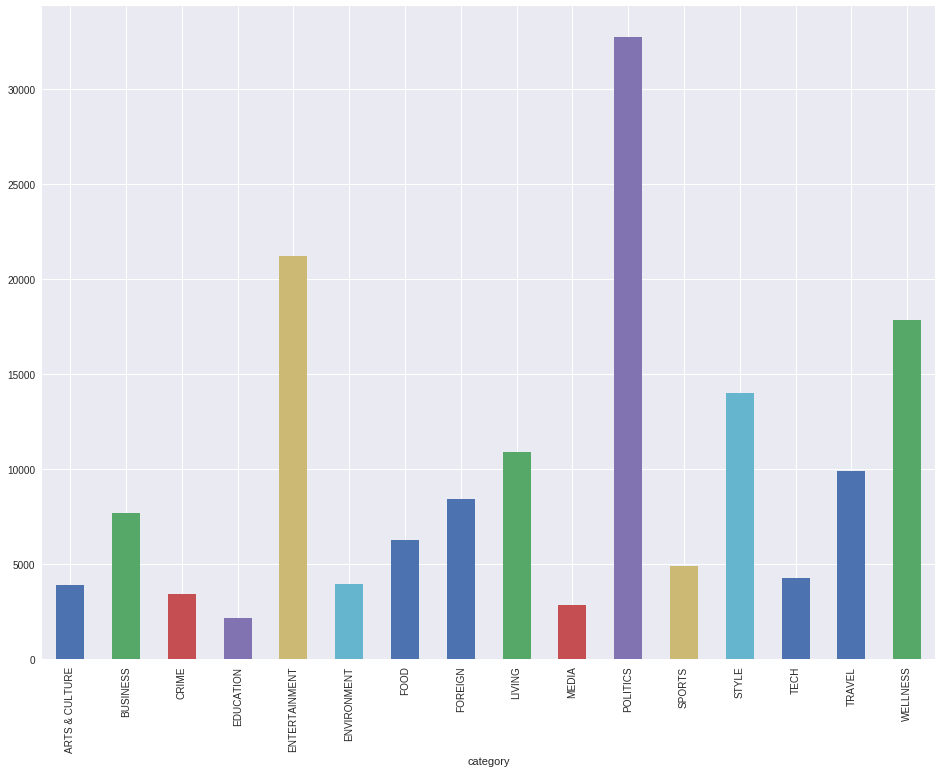

In [34]:
df.loc[df['category'] == 'SCIENCE', 'category'] = 'TECH'
df.loc[df['category'] == 'CULTURE', 'category'] = 'ARTS & CULTURE'
df.loc[df['category'] == 'ARTS', 'category'] = 'ARTS & CULTURE'
df.loc[df['category'] == 'COLLEGE', 'category'] = 'EDUCATION'
df.loc[df['category'] == 'COMEDY', 'category'] = 'ENTERTAINMENT'
df.loc[df['category'] == 'CULTURE & ARTS', 'category'] = 'ARTS & CULTURE'
df.loc[df['category'] == 'FOOD & DRINK', 'category'] = 'FOOD'
df.loc[df['category'] == 'GREEN', 'category'] = 'ENVIRONMENT'
df.loc[df['category'] == 'HEALTHY LIVING', 'category'] = 'LIVING'
df.loc[df['category'] == 'HOME & LIVING', 'category'] = 'LIVING'
df.loc[df['category'] == 'PARENTS', 'category'] = 'PARENTING'
df.loc[df['category'] == 'STYLE & BEAUTY', 'category'] = 'STYLE'
df.loc[df['category'] == 'TASTE', 'category'] = 'STYLE'
df.loc[df['category'] == 'THE WORLDPOST', 'category'] = 'FOREIGN'
df.loc[df['category'] == 'WORLD NEWS', 'category'] = 'FOREIGN'
df.loc[df['category'] == 'WORLDPOST', 'category'] = 'FOREIGN'
df.loc[df['category'] == 'MONEY', 'category'] = 'BUSINESS'

df = df[df['category'] != 'BLACK VOICES']  
df = df[df['category'] != 'FIFTY']
df = df[df['category'] != 'GOOD NEWS']
df = df[df['category'] != 'IMPACT']
df = df[df['category'] != 'LATINO VOICES']
df = df[df['category'] != 'QUEER VOICES']
df = df[df['category'] != 'WEIRD NEWS']
df = df[df['category'] != 'WEDDINGS']
df = df[df['category'] != 'DIVORCE']
df = df[df['category'] != 'RELIGION']
df = df[df['category'] != 'WOMEN']
df = df[df['category'] != 'PARENTING']

after = df

# PP = df[df.category == 'POLITICS']
# drop_indices = np.random.choice(PP.index, 22000, replace=False)
# after = df.drop(drop_indices)

# EE = df[df.category == 'ENTERTAINMENT']
# drop_indices = np.random.choice(EE.index, 12500, replace=False)
# after = after.drop(drop_indices)

# WW = df[df.category == 'WELLNESS']
# drop_indices = np.random.choice(WW.index, 6000, replace=False)
# after = after.drop(drop_indices)

# SS = df[df.category == 'STYLE']
# drop_indices = np.random.choice(SS.index, 6000, replace=False)
# after = after.drop(drop_indices)

# print(len(after))

# drop_indices = np.random.choice(after.index, 50000, replace=False)
# after = after.drop(drop_indices)

print(len(after))
fig = plt.figure(figsize = (16, 12))
after.groupby('category').short_description.count().plot.bar(ylim=0)
plt.show()

In [25]:
#brand new X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(after['short_description'], after['category'], random_state = 0)
print(len(X_train), len(X_test))
count_vect = CountVectorizer(stop_words='english', min_df=5)
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer(smooth_idf=False, sublinear_tf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

115649 38550
(115649, 24340)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


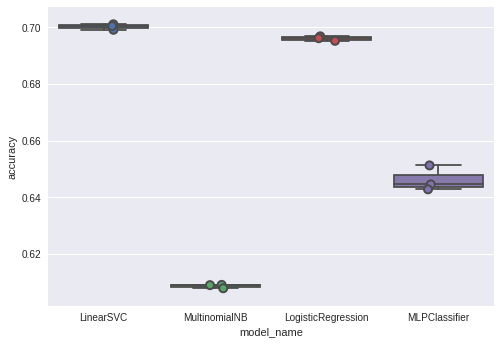

In [26]:
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tfidf, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
             size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [27]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.700222
LogisticRegression    0.696080
MLPClassifier         0.646223
MultinomialNB         0.608678
Name: accuracy, dtype: float64

In [28]:
test_df = pd.read_csv("gdrive/My Drive/bbc_test.csv")
bbc_y = test_df['category']
bbc_x = test_df['short_description']
for model in models:
    model_name = model.__class__.__name__
    clf = model.fit(X_train_tfidf, y_train)
    accuracy = sum([1 for i in range(len(bbc_y)) if clf.predict(count_vect.transform([bbc_x[i]])) == bbc_y[i]] ) / len(bbc_y) * 100
    print(model_name, accuracy)

LinearSVC 46.953733394411366
MultinomialNB 51.580393953275305
LogisticRegression 51.39715987173614
MLPClassifier 44.5716903344022


4.with Data clean and Tuning

In [0]:
models = [
   LinearSVC(loss='hinge', C = 0.45, fit_intercept = False).fit(X_train_tfidf, y_train),
   MultinomialNB(alpha = 0.15),
   LogisticRegression(solver='saga', random_state=0, tol=0.16),
   MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(128,), random_state=1, learning_rate='constant')
]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


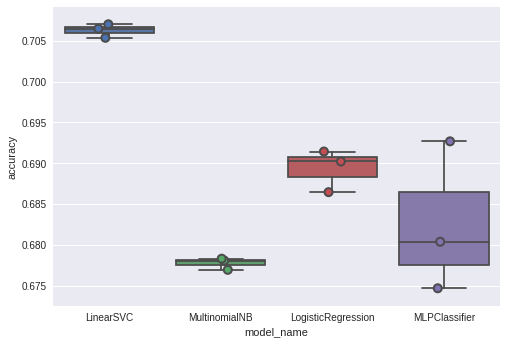

In [32]:
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tfidf, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
             size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [35]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.706284
LogisticRegression    0.689362
MLPClassifier         0.682574
MultinomialNB         0.677766
Name: accuracy, dtype: float64

In [36]:
test_df = pd.read_csv("gdrive/My Drive/bbc_test.csv")
bbc_y = test_df['category']
bbc_x = test_df['short_description']
for model in models:
    model_name = model.__class__.__name__
    clf = model.fit(X_train_tfidf, y_train)
    accuracy = sum([1 for i in range(len(bbc_y)) if clf.predict(count_vect.transform([bbc_x[i]])) == bbc_y[i]] ) / len(bbc_y) * 100
    print(model_name, accuracy)

LinearSVC 50.80164910673385
MultinomialNB 57.26065048098946
LogisticRegression 52.450755840586346
MLPClassifier 45.6710948236372
